In [14]:
import warnings

warnings.simplefilter("ignore")

In [87]:
import pandas as pd
import numpy as np
import click
import logging as LOGGER
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from matplotlib.backends.backend_pdf import PdfPages

from src.data.data import create_directory

LOGGER.basicConfig(format="%(asctime)s %(levelname)s %(message)s", level=LOGGER.INFO)

plt.rc("text", usetex=True)
plt.rc("font", family="serif")
plt.rcParams.update({'font.size': 18})


def get_files(glob_):
    res = glob(glob_)
    if res:
        return res
    raise ValueError(f"No matches for {glob_}")


def read_multiple_csvs(files):
    dfs = []
    for i in files:
        dfs.append(pd.read_csv(i))
    LOGGER.info("Concatenating metrics ...")
    return pd.concat(dfs)

## Deep Learning - Pcap - 1 Seconds - DDoS

2019-11-03 12:23:51,143 INFO Concatenating metrics ...


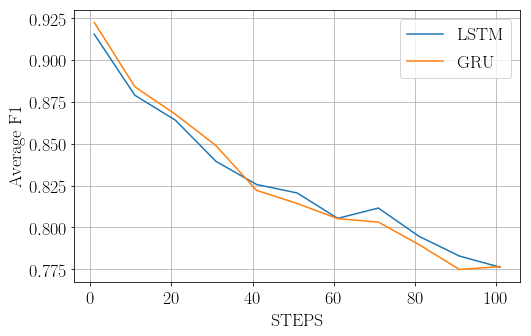

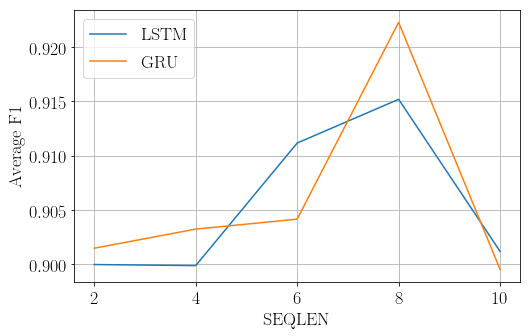

In [93]:
results = read_multiple_csvs(
    get_files("../no_background_fi_output/ddos_1s/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 101]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5))
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["max"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["max"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")
        

## Deep Learning - Pcap - 1 Seconds - Spam

2019-11-03 01:18:16,555 INFO Concatenating metrics ...


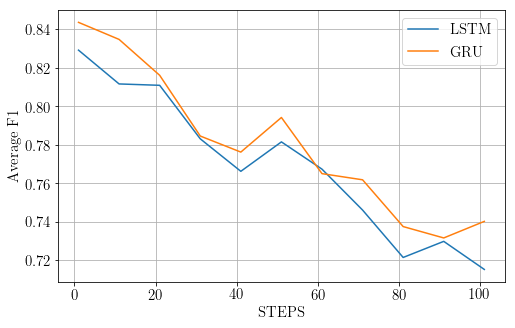

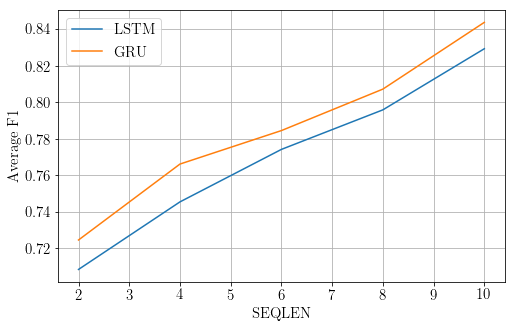

In [43]:
results = read_multiple_csvs(
    get_files("../no_background_output/spam_1s/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 101]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5))
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["max"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["max"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")

## Deep Learning - Pcap - 1 Seconds - IRC

2019-11-03 01:18:17,719 INFO Concatenating metrics ...


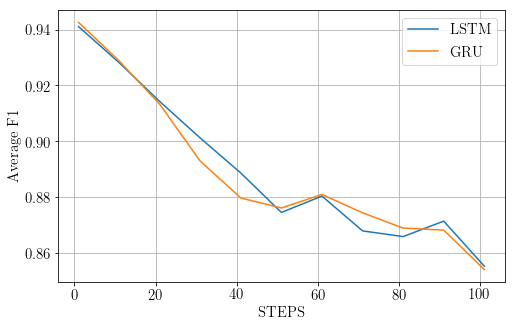

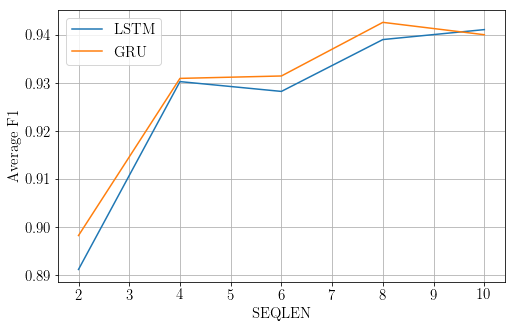

In [44]:
results = read_multiple_csvs(
    get_files("../no_background_output/irc_1s/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 101]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5))
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["max"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["max"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")

# Deep Learning - Pcap - 1 Second - All

2019-11-03 18:56:59,377 INFO Concatenating metrics ...
2019-11-03 18:56:59,531 INFO Concatenating metrics ...
2019-11-03 18:56:59,685 INFO Concatenating metrics ...


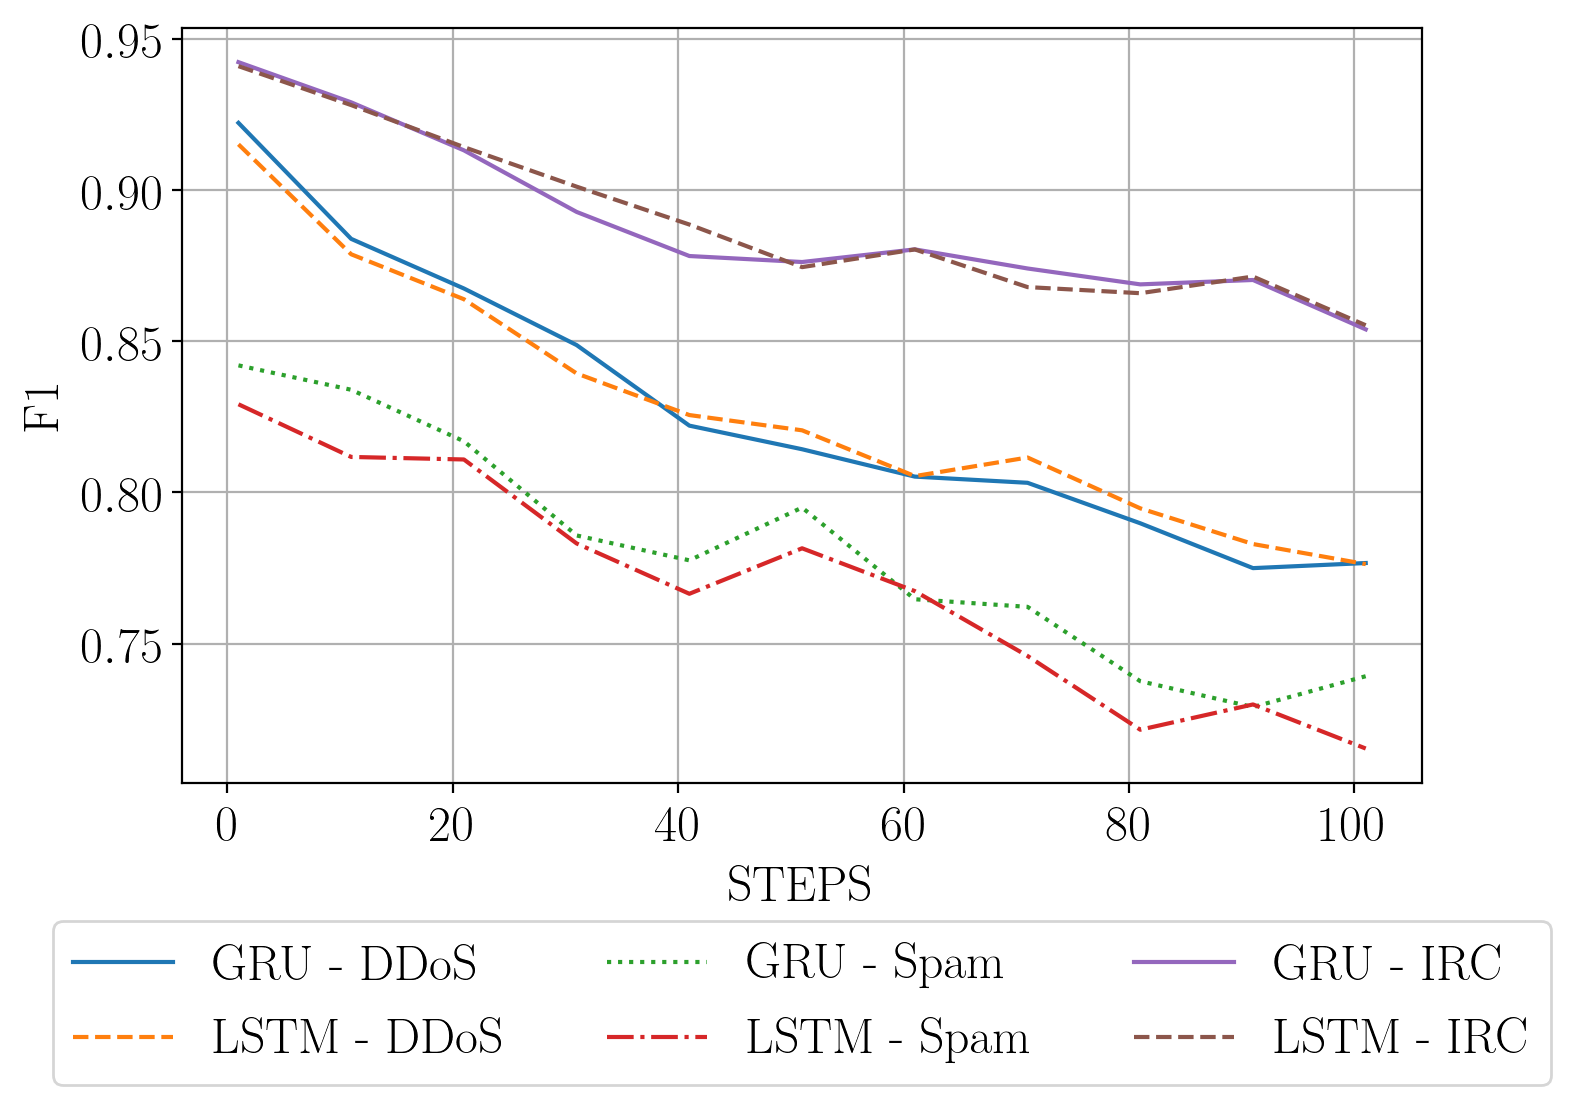

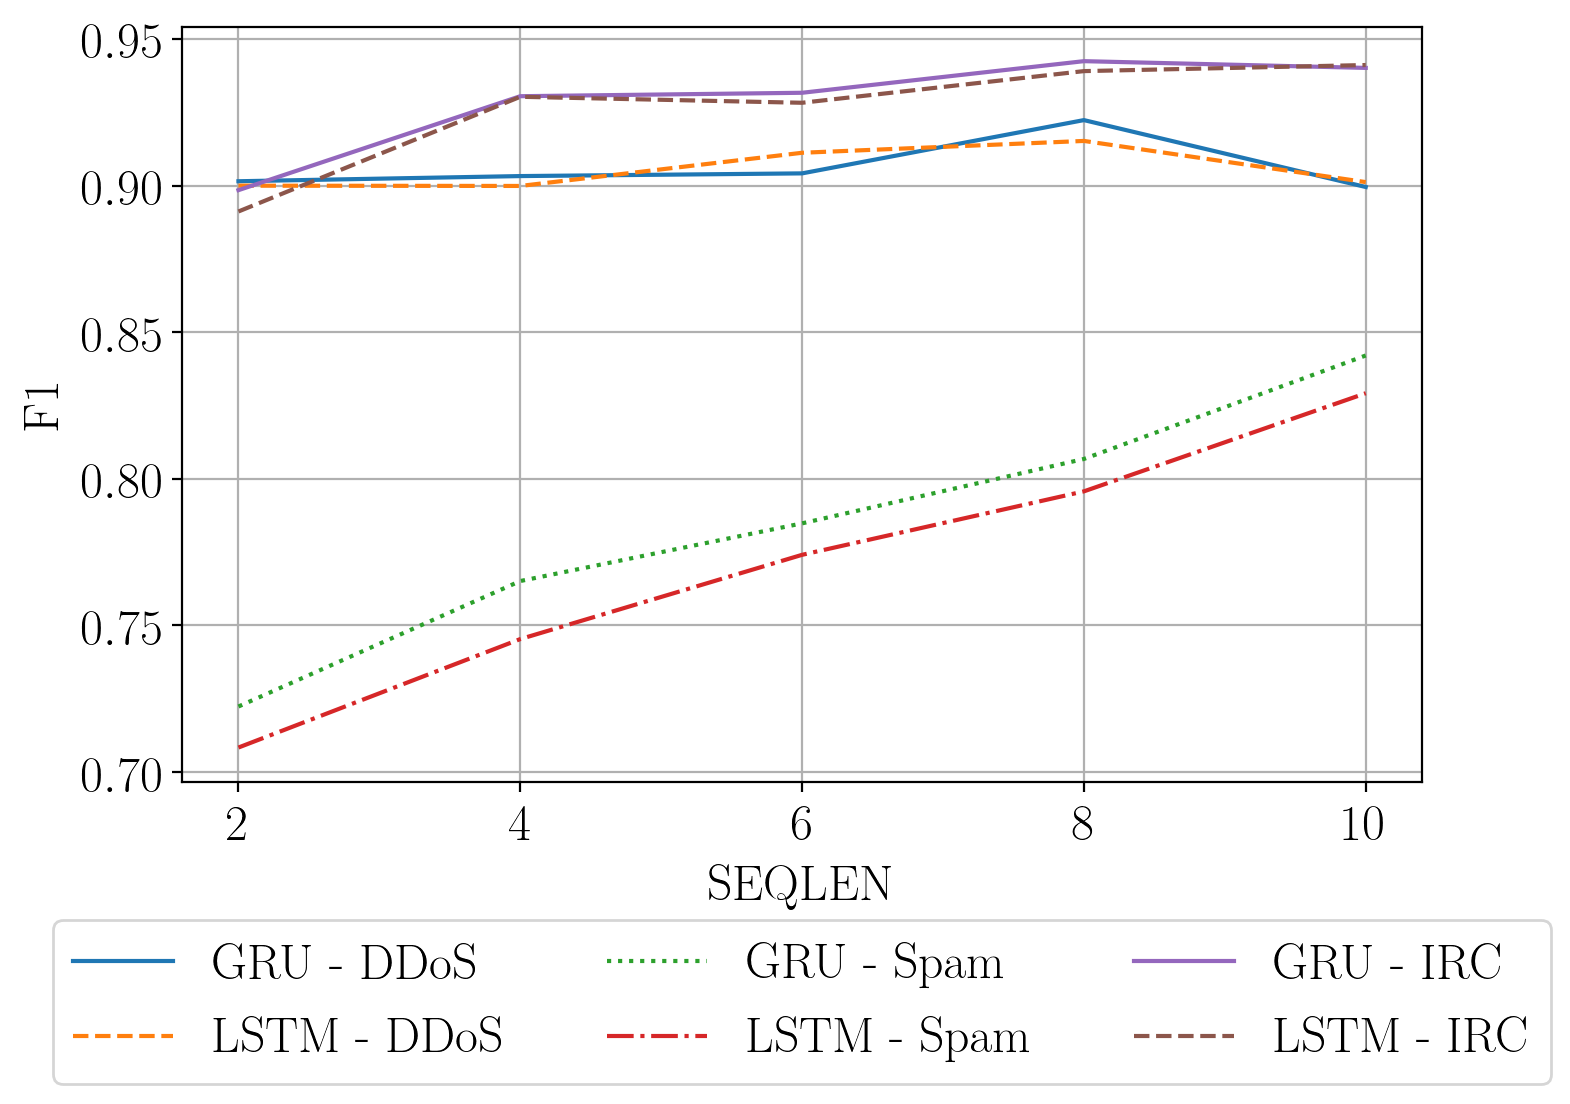

In [123]:
from itertools import cycle

def process(data, name = "DDoS"):
    data["model_name"] = data.model.apply(lambda x: x.split("_")[1].upper() + " - " + name)
    data["seqlen"] = data.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
    data["steps"] = data.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
    data = data[data.steps <= 101]
    data = data[data.seqlen <= 10]
    data = data.sort_values(["steps", "seqlen"])
    data = data[np.logical_not(data.model.str.contains("transition"))]
    return data

ddos_1s = read_multiple_csvs(
    get_files("../no_background_fi_output/ddos_1s/*std*/metrics.csv")
)
spam_1s = read_multiple_csvs(
    get_files("../no_background_fi_output/spam_1s/*std*/metrics.csv")
)
irc_1s = read_multiple_csvs(
    get_files("../no_background_fi_output/irc_1s/*std*/metrics.csv")
)

ddos_1s = process(ddos_1s)
spam_1s = process(spam_1s, "Spam")
irc_1s = process(irc_1s, "IRC")

all_scenarios = [ddos_1s, spam_1s, irc_1s]

metrics = ["f1"]
var = ["steps", "seqlen"]


for v in var:
    plt.figure(figsize=(8, 5), dpi=200)
    plt.tight_layout()
    line = cycle(['-', '--', ':', '-.'])
    for s in all_scenarios:
        for m in metrics:
            #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
            temp = s.set_index("model_name")
            for i in sorted(temp.index.unique()):
                if 'rnn' in i.lower():
                    continue
                plt.plot(
                    temp.ix[i].groupby(v).agg(["max"])[m].index.values,
                    temp.ix[i].groupby(v).agg(["max"])[m],
                    label=i, linestyle=next(line)
                )
#                 plt.plot(
#                     temp.ix["gru"].groupby(v).agg(["max"])[m].index.values,
#                     temp.ix["gru"].groupby(v).agg(["max"])[m],
#                     label="GRU",
#                 )
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, ncol=3)
            plt.grid()
            plt.ylabel(f"{m.upper()}")
            plt.xlabel(f"{v.upper()}")
#             plt.savefig(f'figures/pcap_1s_{v}_{m}.jpg')

## Deep Learning - Pcap - 0.1 Seconds - DDoS

2019-11-03 01:18:34,502 INFO Concatenating metrics ...


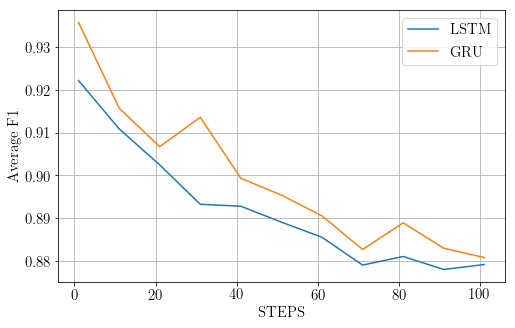

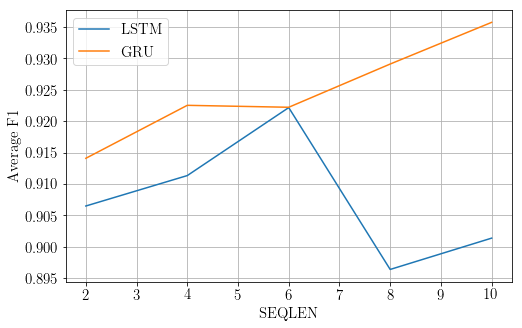

In [49]:
results = read_multiple_csvs(
    get_files("../no_background_output/ddos_0.1s/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 200]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5))
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["max"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["max"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")

## Deep Learning - Pcap - 0.1 Seconds - Spam

2019-11-03 18:55:55,782 INFO Concatenating metrics ...


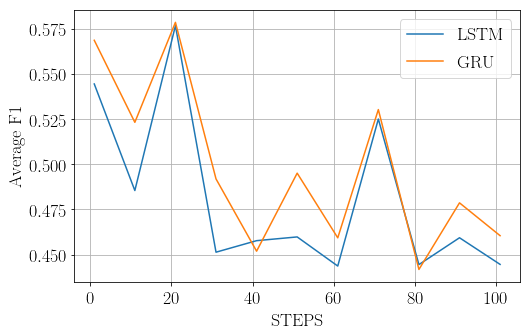

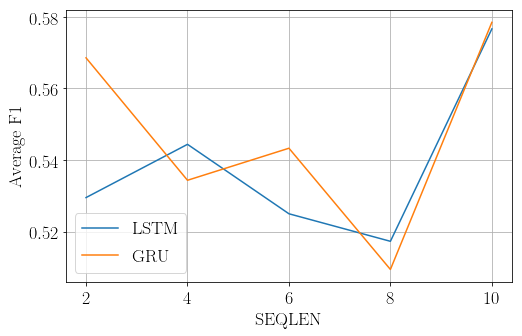

In [117]:
results = read_multiple_csvs(
    get_files("../no_background_fi_output/spam_0.1s/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 200]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5))
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["max"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["max"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")

## Deep Learning - Pcap - 0.1 Seconds - IRC

2019-11-03 01:18:37,829 INFO Concatenating metrics ...


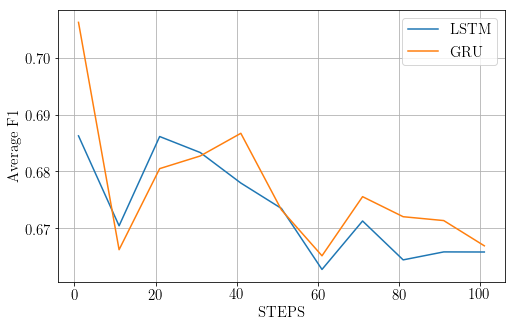

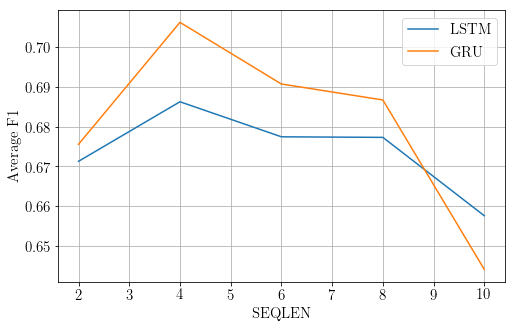

In [51]:
results = read_multiple_csvs(
    get_files("../no_background_output/irc_0.1s/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 200]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5))
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["max"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["max"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")

# Deep Learning - Pcap - 0.1 Second - All

2019-11-03 18:58:32,431 INFO Concatenating metrics ...
2019-11-03 18:58:32,585 INFO Concatenating metrics ...
2019-11-03 18:58:32,738 INFO Concatenating metrics ...


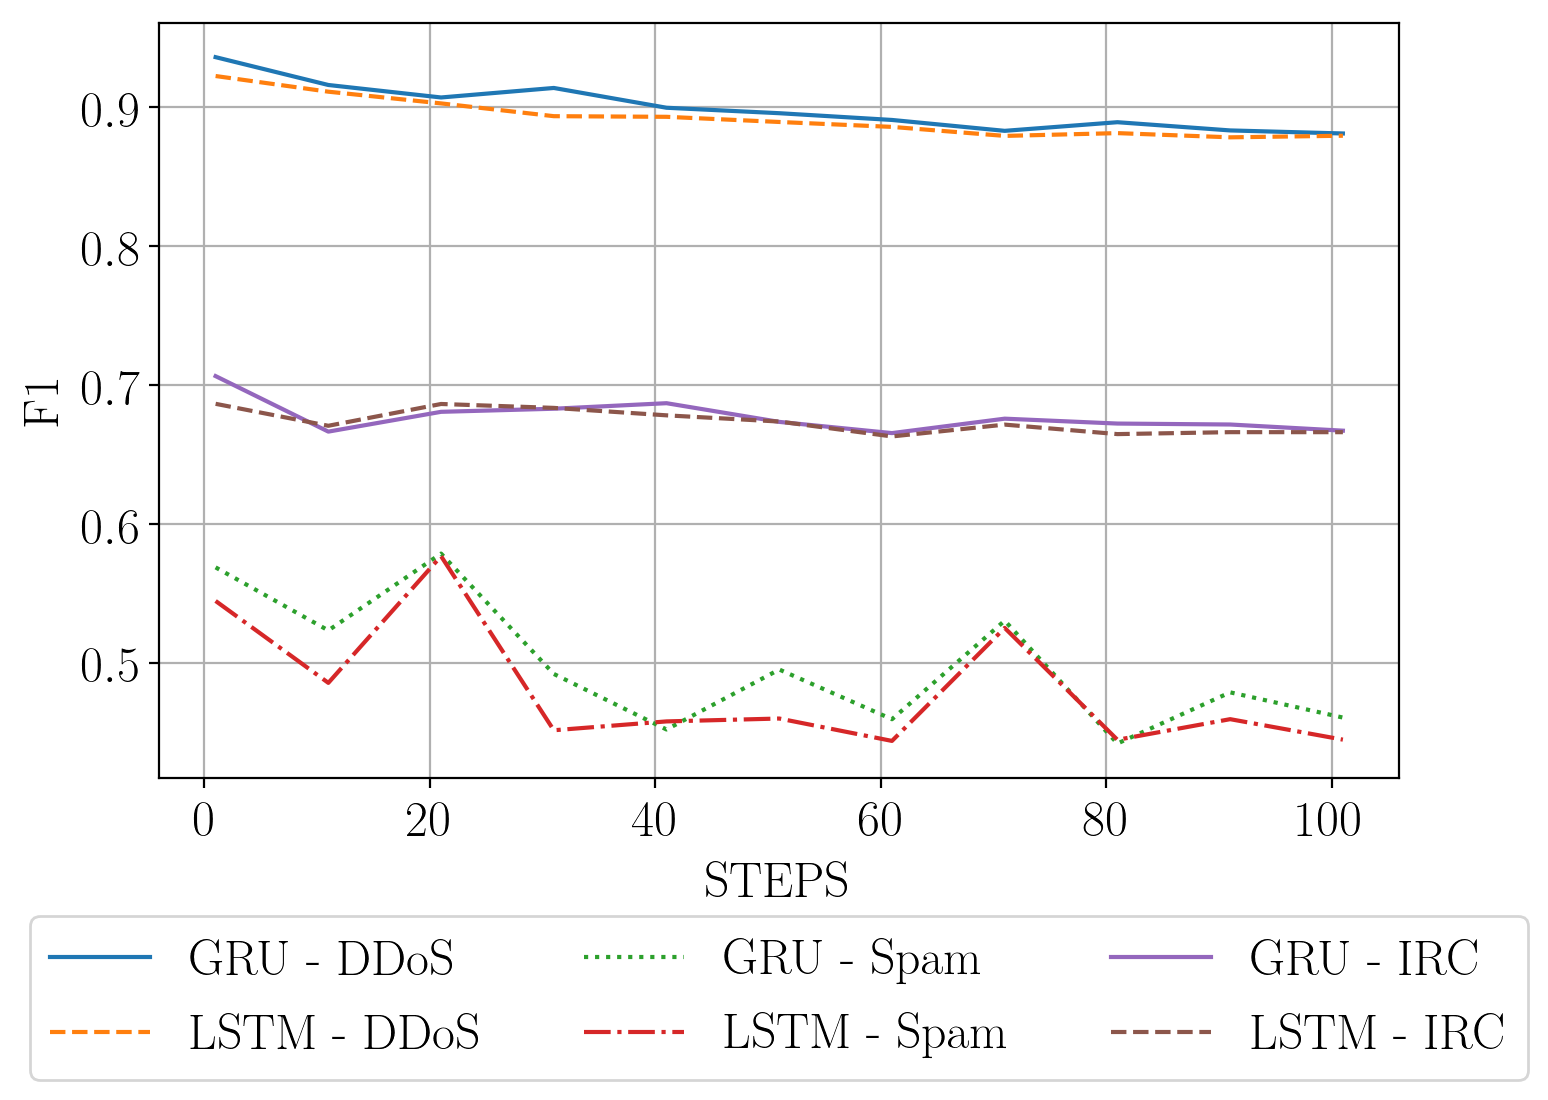

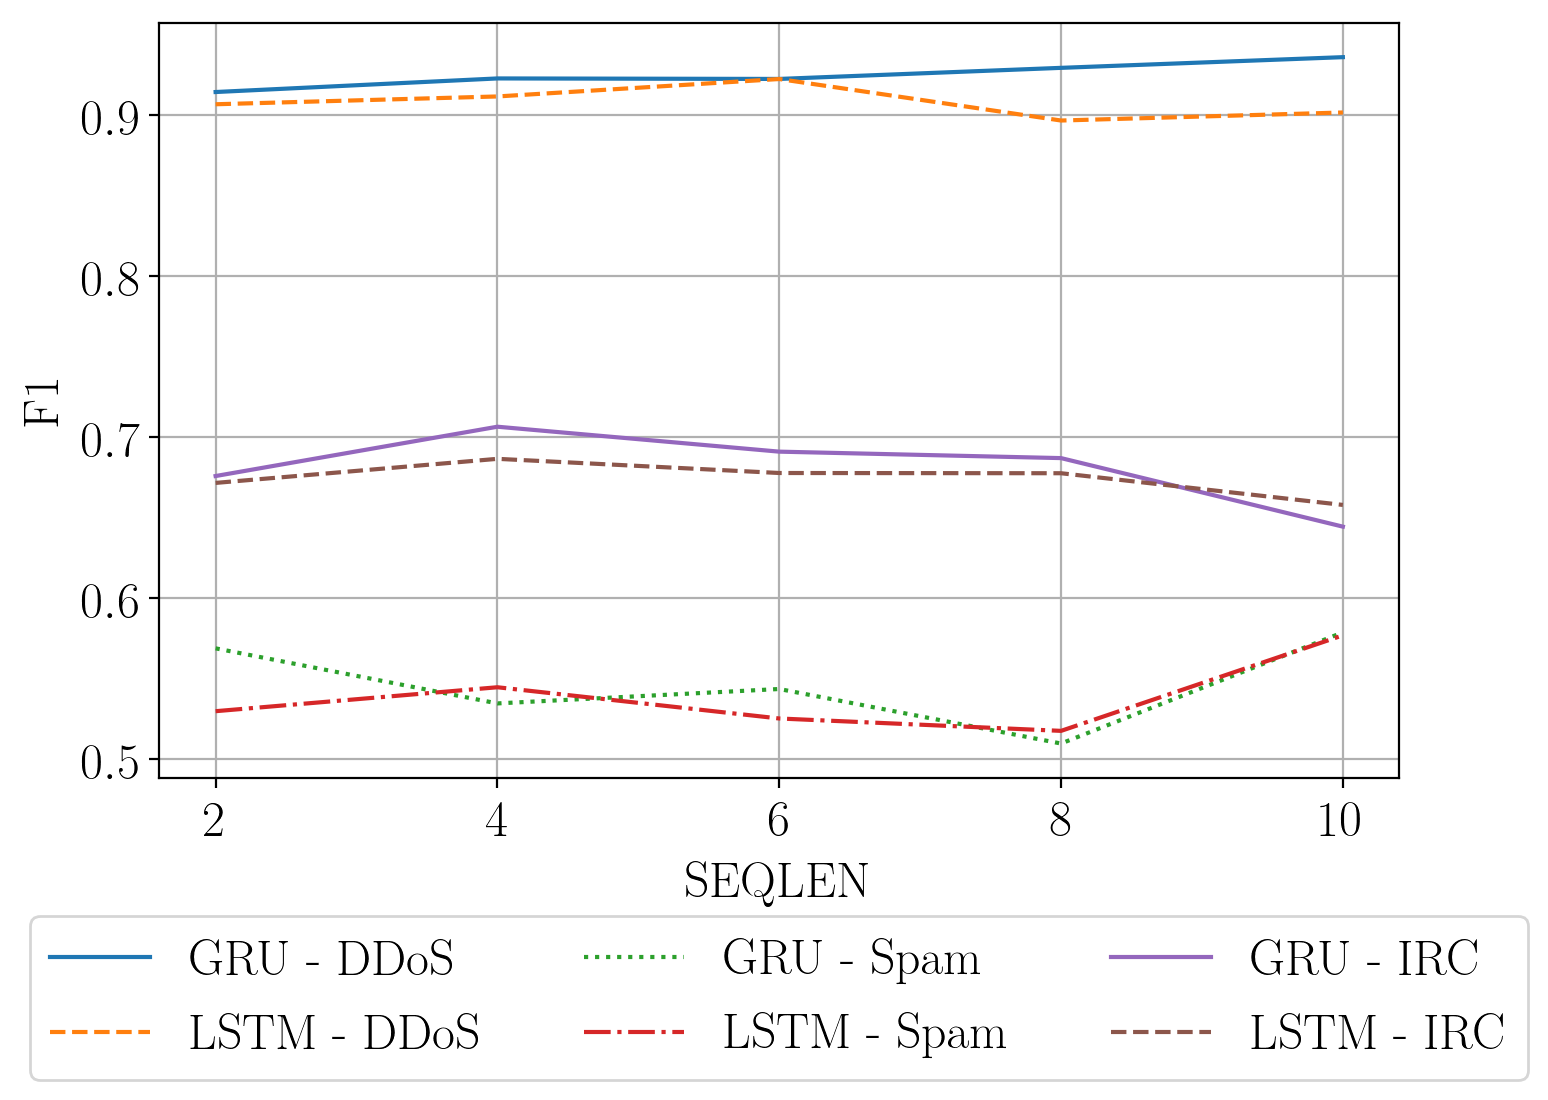

In [125]:
from itertools import cycle

def process(data, name = "DDoS"):
    data["model_name"] = data.model.apply(lambda x: x.split("_")[1].upper() + " - " + name)
    data["seqlen"] = data.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
    data["steps"] = data.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
    data = data[data.steps <= 101]
    data = data[data.seqlen <= 10]
    data = data.sort_values(["steps", "seqlen"])
    data = data[np.logical_not(data.model.str.contains("transition"))]
    return data

ddos_1s = read_multiple_csvs(
    get_files("../no_background_output/ddos_0.1s/*std*/metrics.csv")
)
spam_1s = read_multiple_csvs(
    get_files("../no_background_fi_output/spam_0.1s/*std*/metrics.csv")
)
irc_1s = read_multiple_csvs(
    get_files("../no_background_output/irc_0.1s/*std*/metrics.csv")
)

ddos_1s = process(ddos_1s)
spam_1s = process(spam_1s, "Spam")
irc_1s = process(irc_1s, "IRC")

all_scenarios = [ddos_1s, spam_1s, irc_1s]

metrics = ["f1"]
var = ["steps", "seqlen"]


for v in var:
    plt.figure(figsize=(8, 5), dpi=200)
    plt.tight_layout()
    line = cycle(['-', '--', ':', '-.'])
    for s in all_scenarios:
        for m in metrics:
            #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
            temp = s.set_index("model_name")
            for i in sorted(temp.index.unique()):
                if 'rnn' in i.lower():
                    continue
                plt.plot(
                    temp.ix[i].groupby(v).agg(["max"])[m].index.values,
                    temp.ix[i].groupby(v).agg(["max"])[m],
                    label=i, linestyle=next(line)
                )
#                 plt.plot(
#                     temp.ix["gru"].groupby(v).agg(["max"])[m].index.values,
#                     temp.ix["gru"].groupby(v).agg(["max"])[m],
#                     label="GRU",
#                 )
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, ncol=3)
            plt.grid()
            plt.ylabel(f"{m.upper()}")
            plt.xlabel(f"{v.upper()}")
#             plt.savefig(f'figures/pcap_1s_{v}_{m}.jpg')

## Deep Learning - Pcap - 10 Seconds - DDoS

2019-11-03 01:18:39,510 INFO Concatenating metrics ...


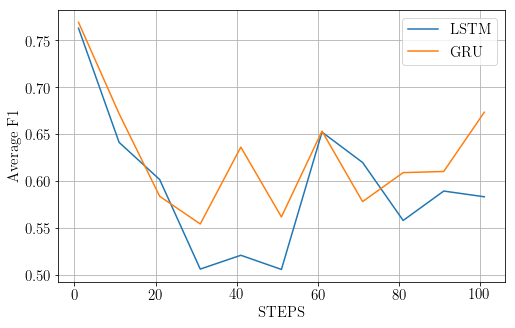

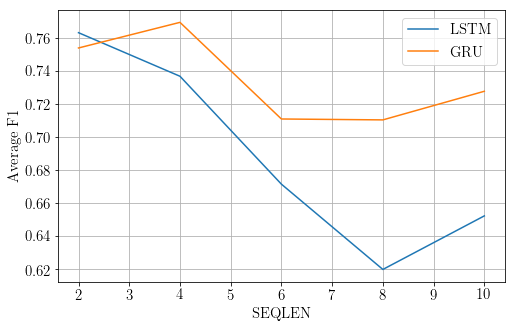

In [52]:
results = read_multiple_csvs(
    get_files("../no_background_output/ddos_10s/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 200]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5))
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["max"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["max"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")

## Deep Learning - Pcap - 10 Seconds - Spam

2019-11-03 01:18:41,234 INFO Concatenating metrics ...


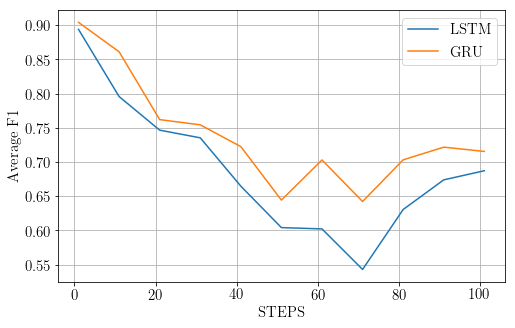

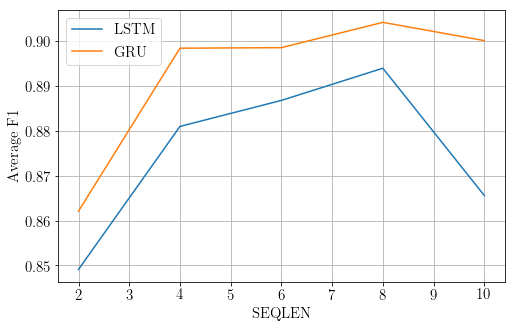

In [53]:
results = read_multiple_csvs(
    get_files("../no_background_output/spam_10s/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 200]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5))
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["max"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["max"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")

## Deep Learning - Pcap - 10 Seconds - IRC

2019-11-03 01:18:42,298 INFO Concatenating metrics ...


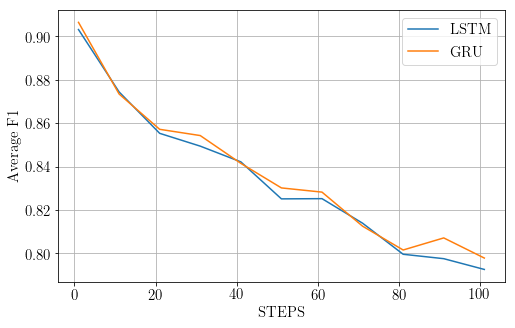

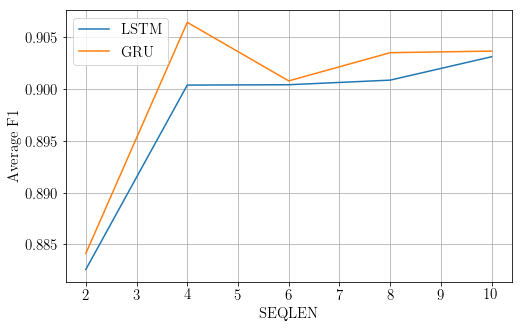

In [54]:
results = read_multiple_csvs(
    get_files("../no_background_output/irc_10s/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 200]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5))
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["max"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["max"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["max"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")

# Deep Learning - Pcap - 10 Second - All

2019-11-03 18:59:23,227 INFO Concatenating metrics ...
2019-11-03 18:59:23,381 INFO Concatenating metrics ...
2019-11-03 18:59:23,535 INFO Concatenating metrics ...


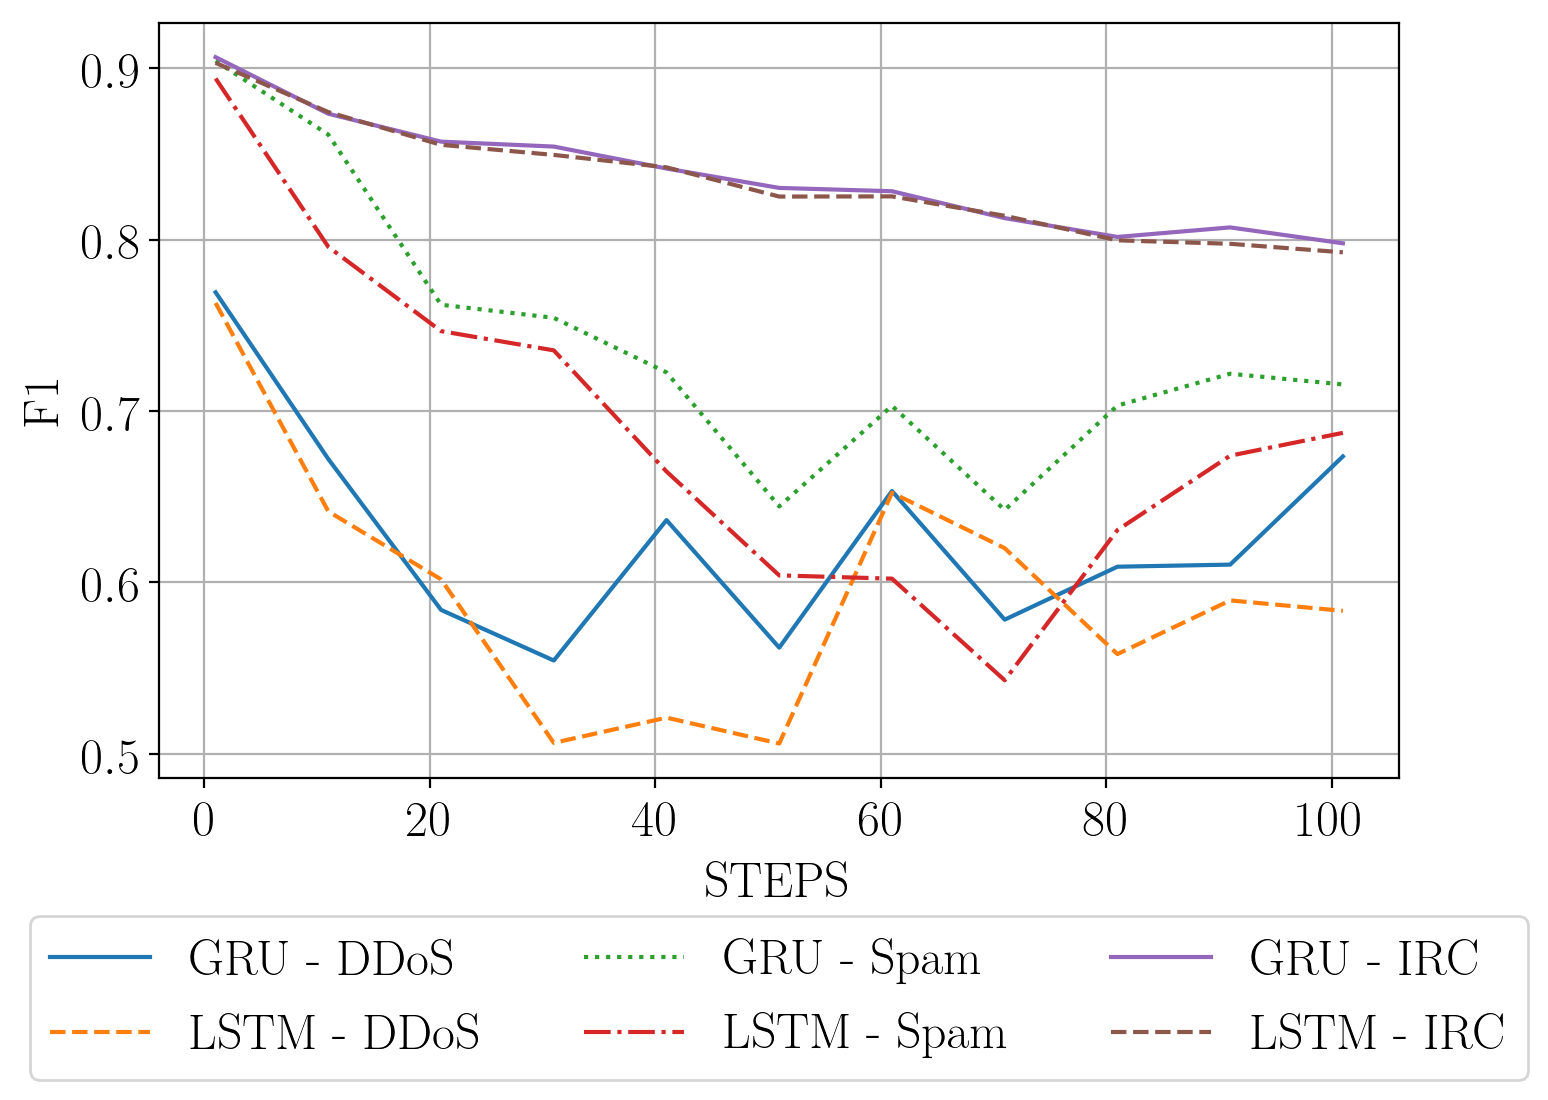

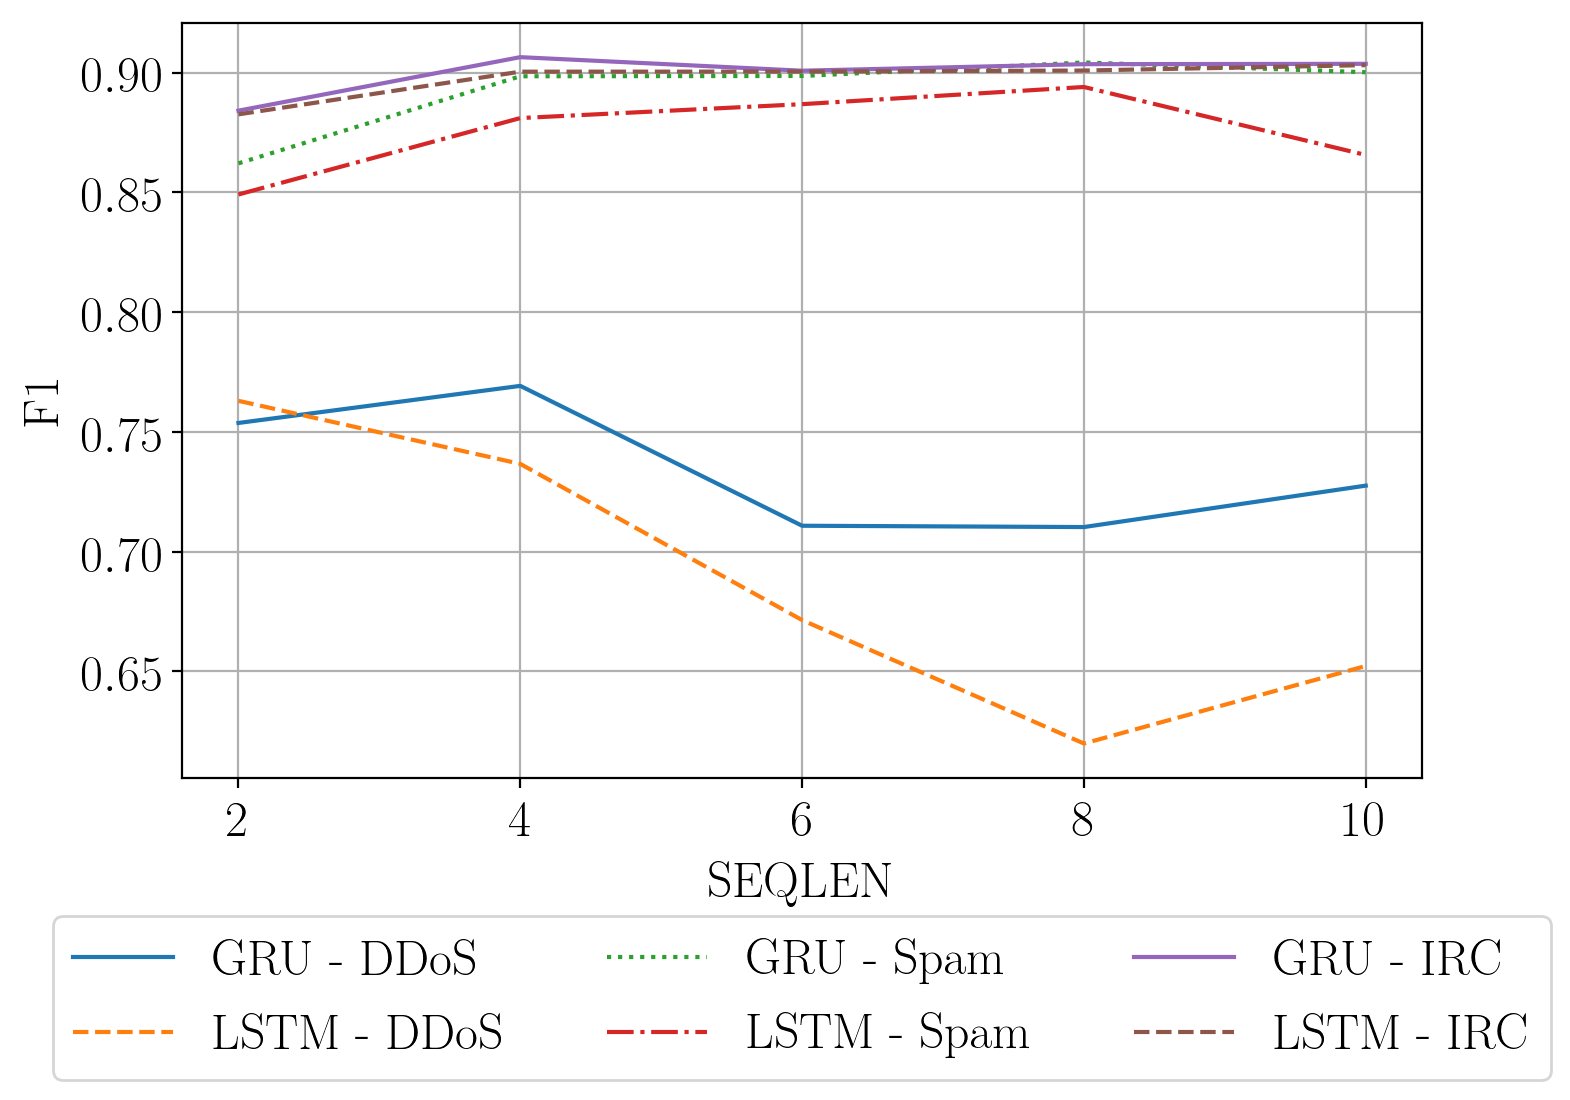

In [126]:
from itertools import cycle

def process(data, name = "DDoS"):
    data["model_name"] = data.model.apply(lambda x: x.split("_")[1].upper() + " - " + name)
    data["seqlen"] = data.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
    data["steps"] = data.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
    data = data[data.steps <= 101]
    data = data[data.seqlen <= 10]
    data = data.sort_values(["steps", "seqlen"])
    data = data[np.logical_not(data.model.str.contains("transition"))]
    return data

ddos_1s = read_multiple_csvs(
    get_files("../no_background_output/ddos_10s/*std*/metrics.csv")
)
spam_1s = read_multiple_csvs(
    get_files("../no_background_output/spam_10s/*std*/metrics.csv")
)
irc_1s = read_multiple_csvs(
    get_files("../no_background_output/irc_10s/*std*/metrics.csv")
)

ddos_1s = process(ddos_1s)
spam_1s = process(spam_1s, "Spam")
irc_1s = process(irc_1s, "IRC")

all_scenarios = [ddos_1s, spam_1s, irc_1s]

metrics = ["f1"]
var = ["steps", "seqlen"]


for v in var:
    plt.figure(figsize=(8, 5), dpi=200)
    plt.tight_layout()
    line = cycle(['-', '--', ':', '-.'])
    for s in all_scenarios:
        for m in metrics:
            #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
            temp = s.set_index("model_name")
            for i in sorted(temp.index.unique()):
                if 'rnn' in i.lower():
                    continue
                plt.plot(
                    temp.ix[i].groupby(v).agg(["max"])[m].index.values,
                    temp.ix[i].groupby(v).agg(["max"])[m],
                    label=i, linestyle=next(line)
                )
#                 plt.plot(
#                     temp.ix["gru"].groupby(v).agg(["max"])[m].index.values,
#                     temp.ix["gru"].groupby(v).agg(["max"])[m],
#                     label="GRU",
#                 )
            plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, ncol=3)
            plt.grid()
            plt.ylabel(f"{m.upper()}")
            plt.xlabel(f"{v.upper()}")
#             plt.savefig(f'figures/pcap_1s_{v}_{m}.jpg')

# All Models Combined Performance

In [99]:
results = read_multiple_csvs(
    get_files("../no_background_fi_output/*irc*/*std*/metrics.csv")
)

2019-11-03 18:46:17,190 INFO Concatenating metrics ...


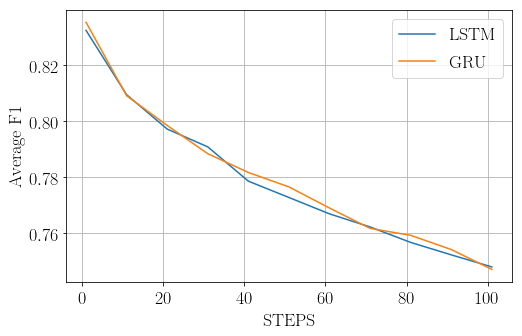

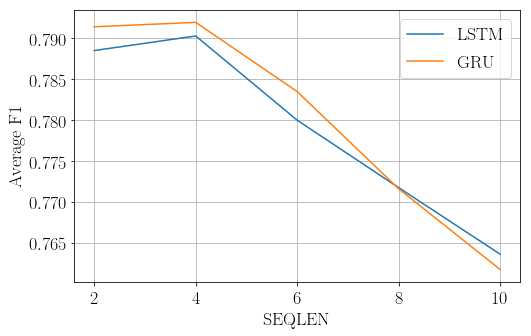

In [100]:
results = read_multiple_csvs(
    get_files("../no_background_fi_output/*irc*/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 200]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5))
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["mean"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["mean"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["mean"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["mean"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")

2019-11-03 18:46:36,179 INFO Concatenating metrics ...


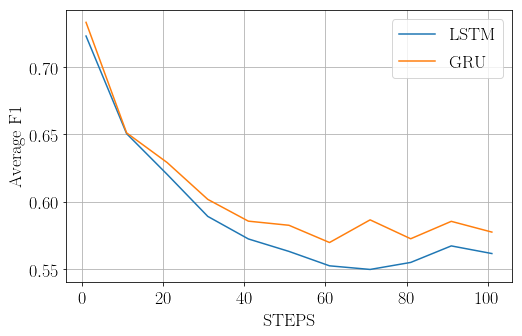

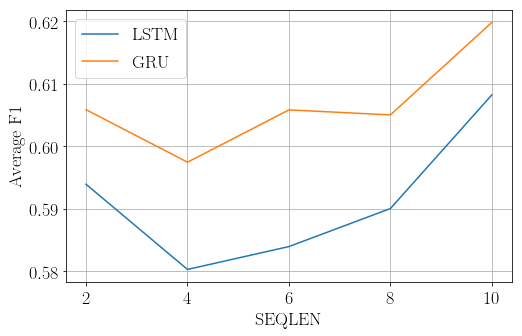

In [101]:
results = read_multiple_csvs(
    get_files("../no_background_fi_output/*spam*/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 200]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5))
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["mean"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["mean"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["mean"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["mean"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")

2019-11-03 18:46:45,724 INFO Concatenating metrics ...


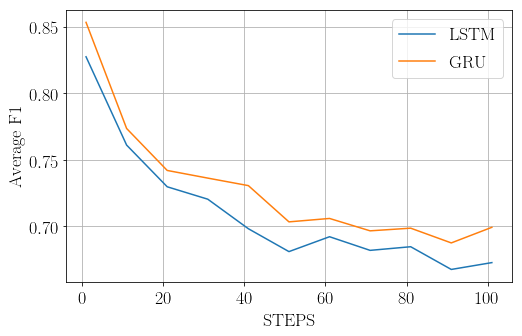

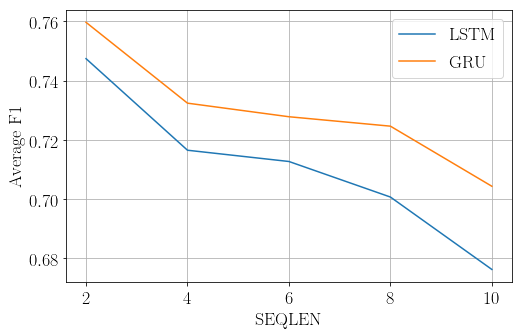

In [102]:
results = read_multiple_csvs(
    get_files("../no_background_fi_output/*ddos*/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 200]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5))
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["mean"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["mean"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["mean"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["mean"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")

2019-11-03 19:05:58,014 INFO Concatenating metrics ...


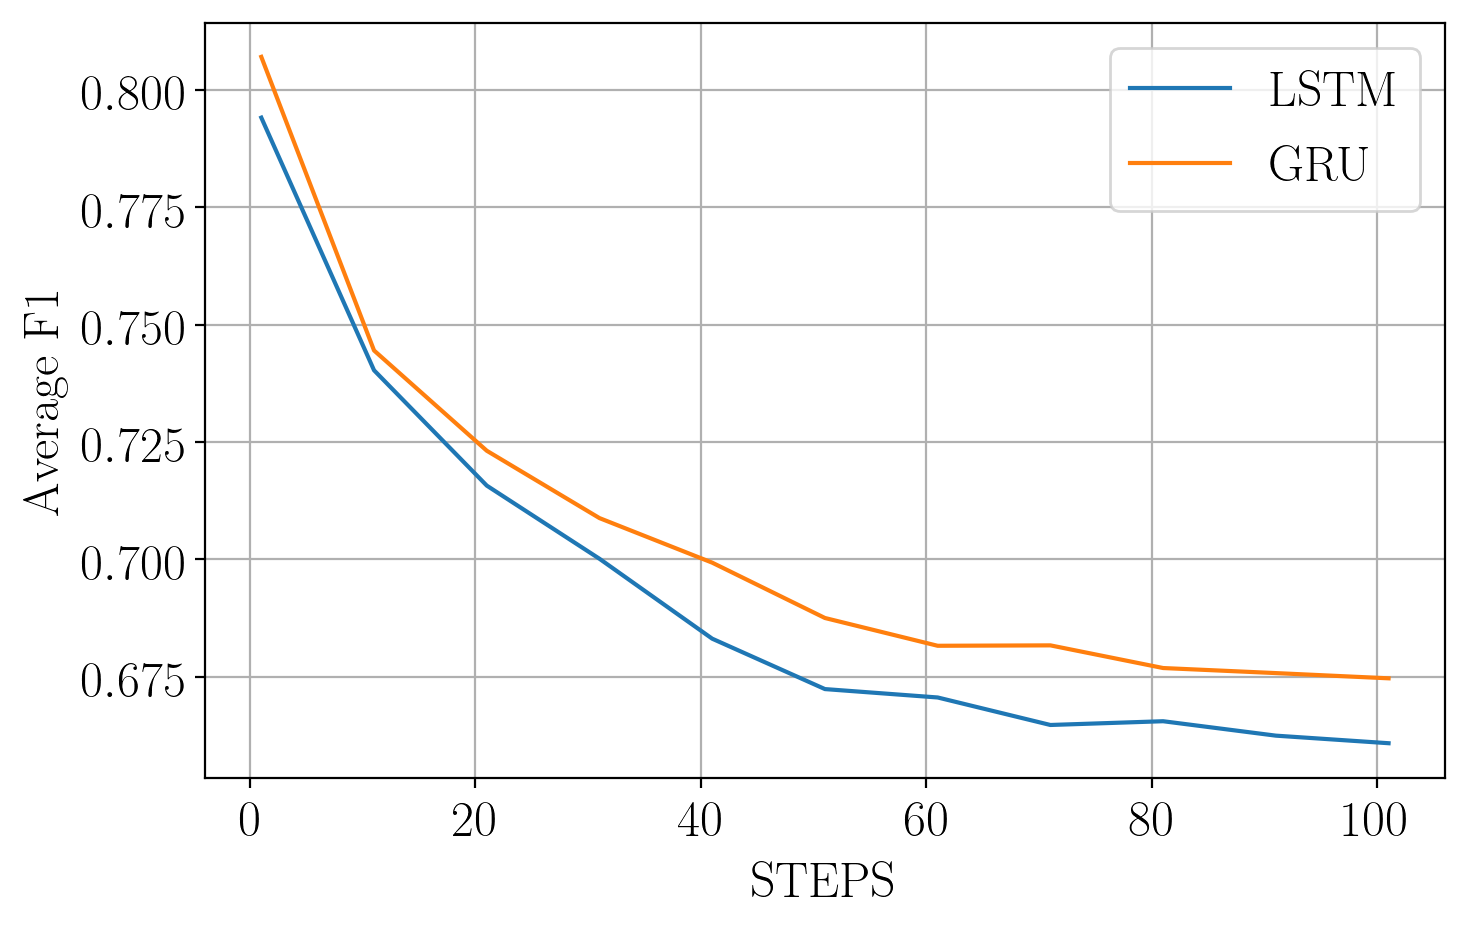

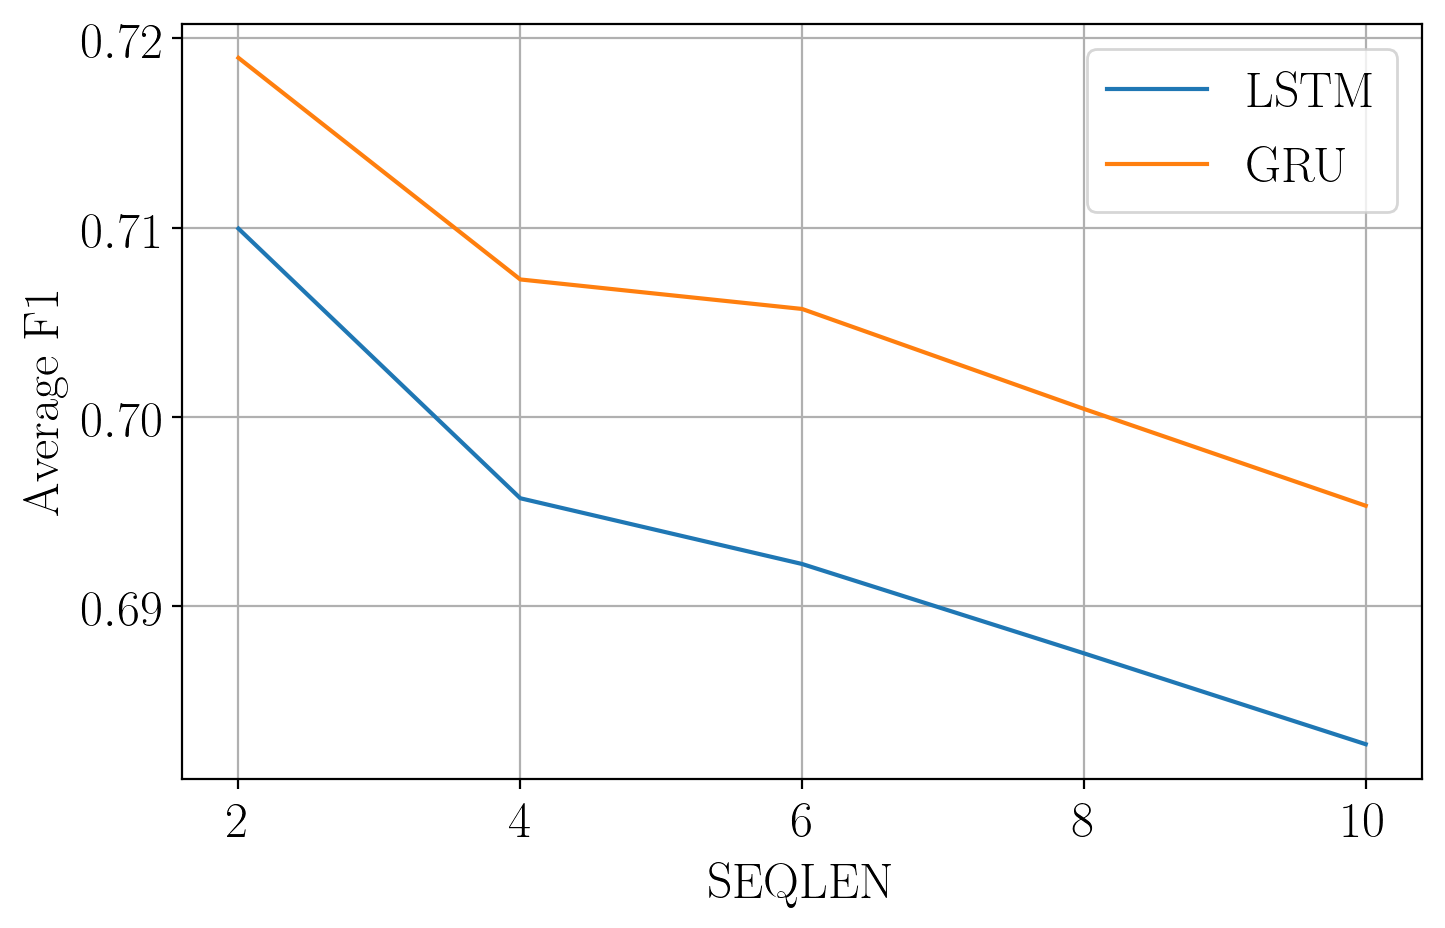

In [129]:
results = read_multiple_csvs(
    get_files("../no_background_fi_output/*/*std*/metrics.csv")
)
results["model_name"] = results.model.apply(lambda x: x.split("_")[1])
results["seqlen"] = results.model.apply(lambda x: int(x.split("_")[2].split("s")[0]))
results["steps"] = results.model.apply(lambda x: int(x.split("_")[3].split("s")[0]))
results = results[results.steps <= 200]
results = results[results.seqlen <= 10]
results = results.sort_values(["steps", "seqlen"])
results_binary = results[np.logical_not(results.model.str.contains("transition"))]
results_transitional = results[results.model.str.contains("transition")]

temp = results_binary.set_index("model_name")
metrics = ["f1"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5), dpi=200)
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
        plt.plot(
            temp.ix["lstm"].groupby(v).agg(["mean"])[m].index.values,
            temp.ix["lstm"].groupby(v).agg(["mean"])[m],
            label="LSTM",
        )
        plt.plot(
            temp.ix["gru"].groupby(v).agg(["mean"])[m].index.values,
            temp.ix["gru"].groupby(v).agg(["mean"])[m],
            label="GRU",
        )
        plt.legend()
        plt.grid()
        plt.ylabel(f"Average {m.upper()}")
        plt.xlabel(f"{v.upper()}")

# Final Model

In [149]:
results = read_multiple_csvs(
    sorted(get_files("../no_background_fi_output/full_final/*/metrics.csv"))
)
results = results.drop(columns=[results.columns[0]])
results.head()
results['model'] = sorted([f"{i}_{j}" for i in range(2,11,2) for j in range(1,102,10)])
results['seqlen'] = results.model.apply(lambda x: x.split('_')[0])
results['steps'] = results.model.apply(lambda x: x.split('_')[1])

2019-11-04 15:18:51,721 INFO Concatenating metrics ...


array([-7.22426188e-01, -9.05160292e-02, -9.71652998e-01, -8.67682928e-02,
       -2.15599213e-01, -4.23638314e-01, -7.35590582e-01, -2.70458672e-01,
       -1.94693810e-01, -1.70076456e-01, -4.37652123e-01, -1.26296554e-01,
       -3.39317895e-01, -3.91932868e-01, -5.81459168e-01, -6.43940413e-01,
       -1.61057990e-02, -7.34779703e-01, -4.13851412e-01, -3.03577321e+00,
       -1.47028265e+00, -6.60646331e-01, -7.57702107e-01, -3.64940793e-02,
       -6.55677029e-01, -3.43900503e-01, -1.94402926e-01, -1.52089753e+00,
       -2.59451557e-01, -2.43530455e-01, -9.98140654e-02, -4.85879046e-02,
       -6.48833797e-01, -2.62646408e-01, -2.47233608e-01, -1.97586347e-01,
       -1.06330441e-01, -8.10511468e-01, -3.22523445e-02, -1.18393376e+00,
       -3.80683396e-01, -1.27057511e-01, -1.17112315e+00, -2.50828219e-01,
       -9.70572079e-01, -8.28573213e-02, -2.30793401e-01, -1.29472712e-01,
       -2.61079779e-01, -4.51584140e-02, -9.84532654e-02, -3.37739579e-01,
       -2.26587384e-03, -

2019-11-05 01:37:28,336 INFO Concatenating metrics ...


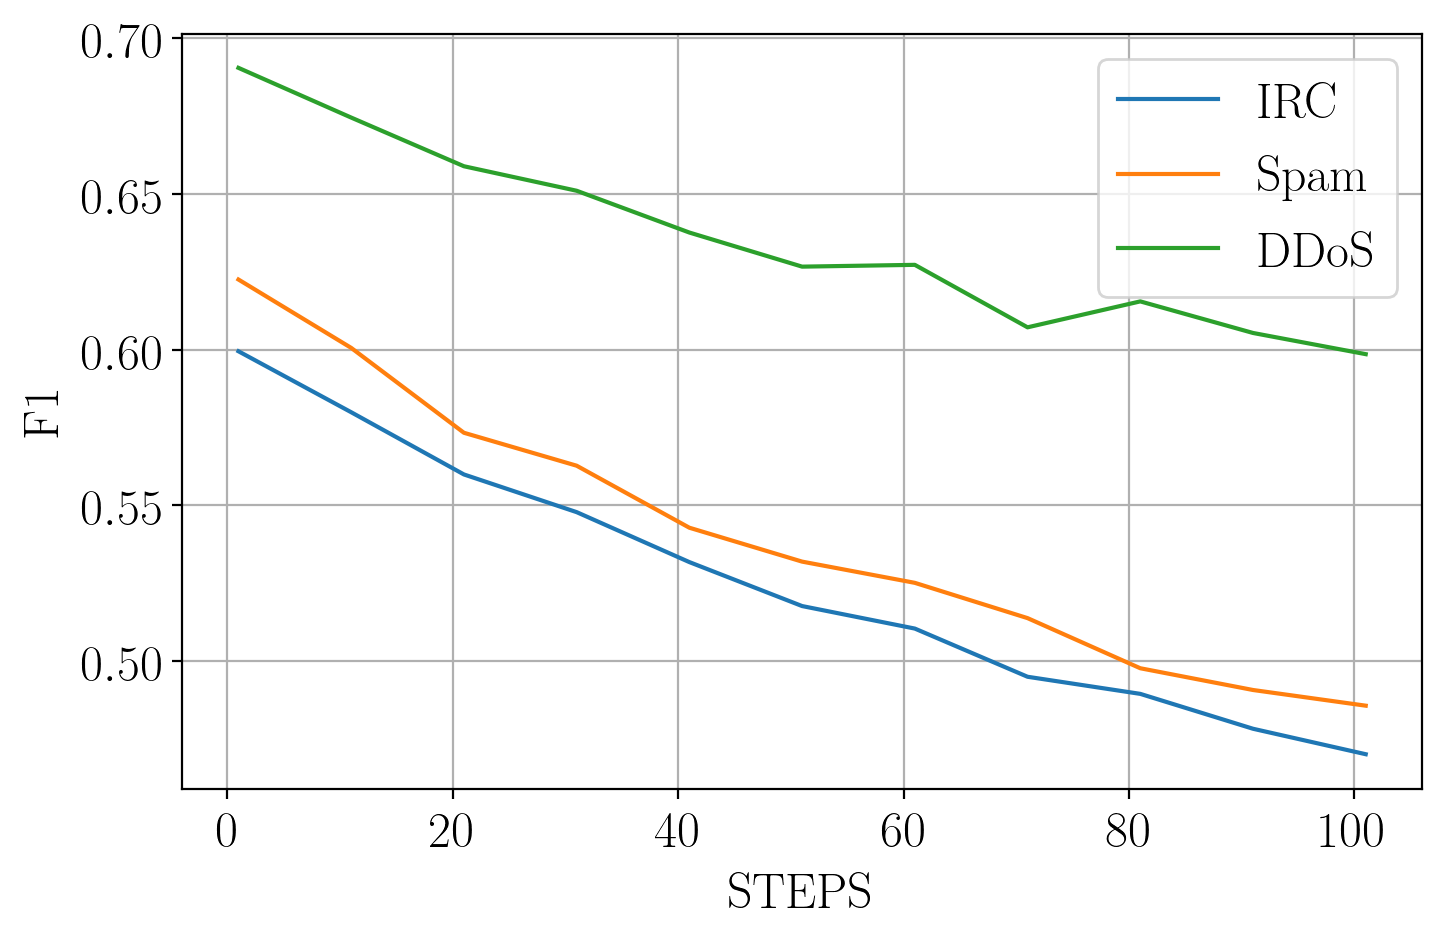

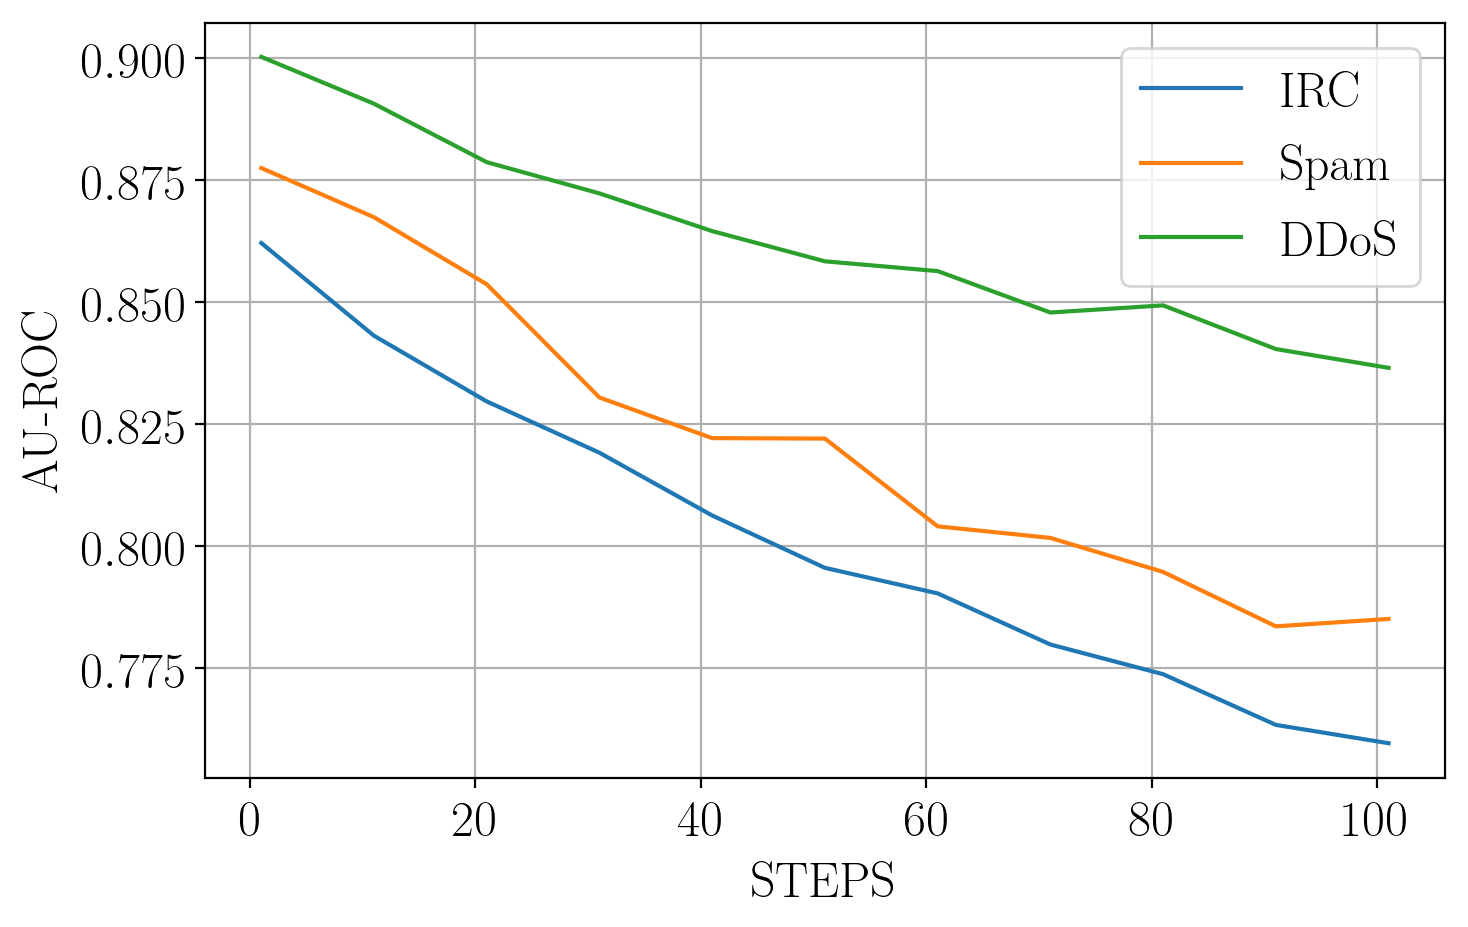

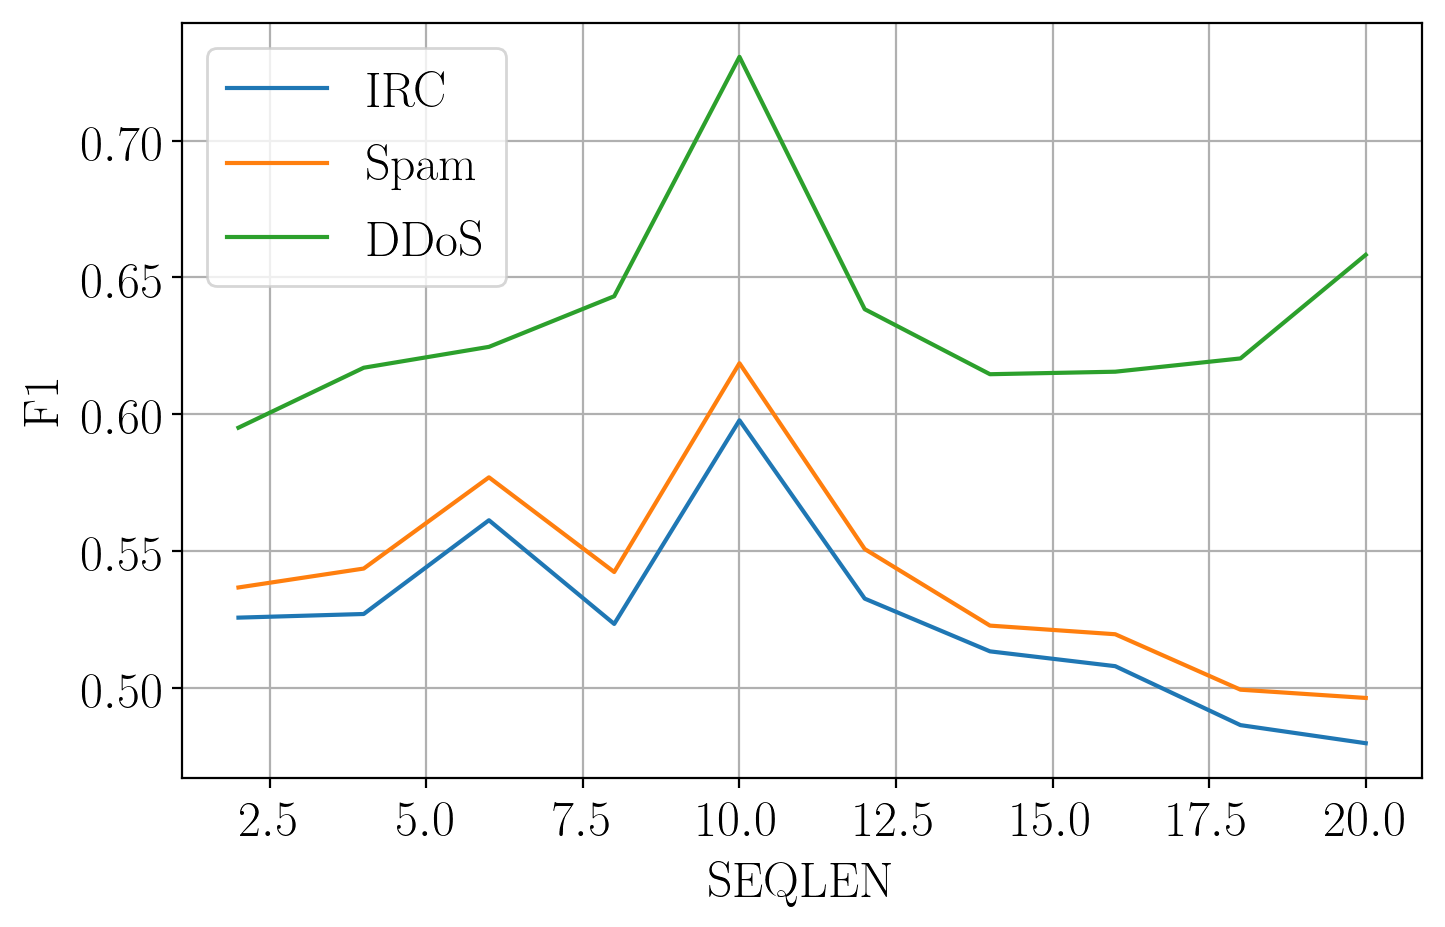

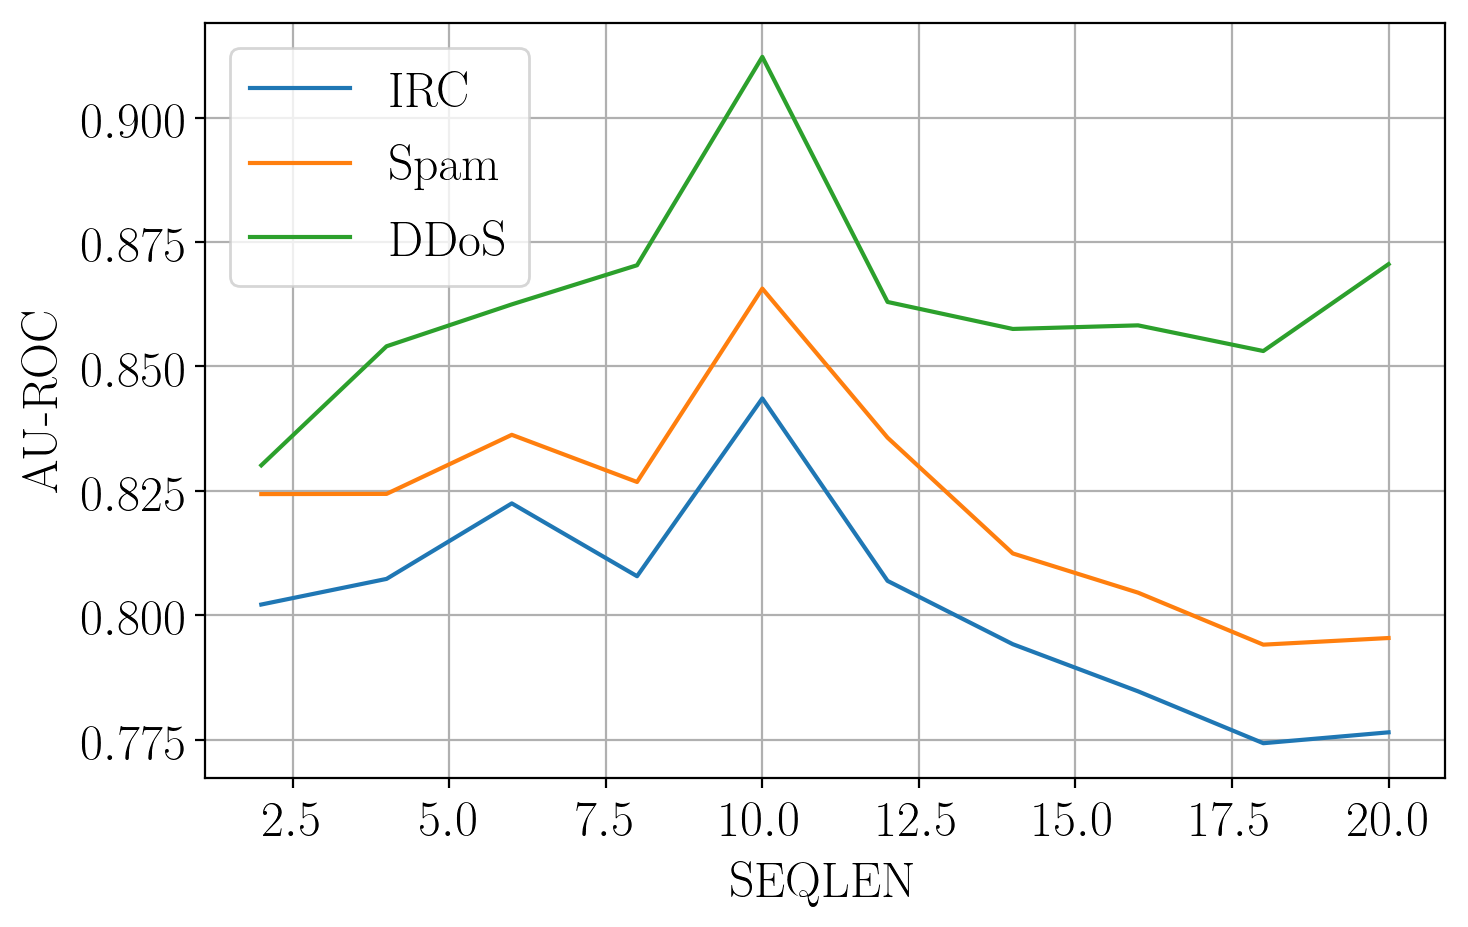

In [181]:
results = read_multiple_csvs(
    sorted(get_files("../no_background_fi_output/full_final/*/metrics.csv"))
)
results = results.drop(columns=[results.columns[0]])
results.head()
results['model'] = sorted([f"{i}_{j}" for i in range(2,21,2) for j in range(1,102,10)])
results['seqlen'] = results.model.apply(lambda x: int(x.split('_')[0]))
results['steps'] = results.model.apply(lambda x: int(x.split('_')[1]))
results = results.sort_values(["steps", "seqlen"])
for i in results.columns:
    if '_1' in i:
        results[i] = results[i] + (np.log10(np.random.rand(len(results))) * -1) / 25
attack_labels=['IRC', 'Spam', 'DDoS']
temp = results
metrics = ["f1", "au-roc"]
var = ["steps", "seqlen"]
for v in var:
    for m in metrics:
        plt.figure(figsize=(8, 5), dpi=200)
        for i in range(3):
        #         plt.plot(temp.ix['rnn'].groupby(v).agg(['mean'])[m].index.values, temp.ix['rnn'].groupby(v).agg(['mean'])[m], label='RNN')
            plt.plot(
                temp.groupby(v).agg(["mean"])[m+'_'+str(i)].index.values,
                temp.groupby(v).agg(["mean"])[m+'_'+str(i)],
                label=attack_labels[i]
            )

        plt.legend()
        plt.grid()
        plt.ylabel(f"{m.upper()}")
        plt.xlabel(f"{v.upper()}")